In [5]:
import sys
from seaborn import barplot
sys.path.insert(0, '../../')

from toolkit import textBlock, textClean, letterFrequency, affineEncipher, autokeyEncipher, trithemiusEncipher, vigenereEncipher

with open('../../../text-files/pride-and-prejudice.txt', encoding="utf8") as f:
    ciphertext = textClean(f.read())

# Identifying a Polyalphabetic Cipher

Polyalphabetic ciphers are, by design, resistant to frequency analysis. Their purpose is to disguise the true frequency of the plaintext letters by mapping high frequency letters in the plaintext to multiple letters in the ciphertext, and mapping multiple plaintext letters to low frequency letters in the ciphertext. The result is a more uniform distribution of characters in the ciphertext which thwarts our ability to deduce information about the plaintext from the ciphertext based on these frequencies. We see this characteristic appear in barcharts of ciphertext letter frequency as the bars even out towards a shared value.

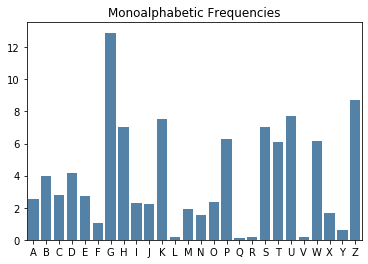

In [9]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = letterFrequency( affineEncipher( ciphertext, 20, 3) )
barplot(labels, values, color='steelblue').set_title('Monoalphabetic Frequencies');

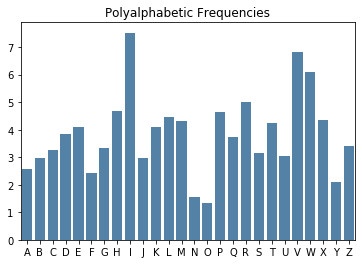

In [10]:
values = letterFrequency( vigenereEncipher( ciphertext, 'pride') )
barplot(labels, values, color='steelblue').set_title('Polyalphabetic Frequencies');

What's needed is a more quantitative way of determining if the bars have high variation, a sign of a monoalphabetic cipher, or low variation, a sign of a polyalphabetic cipher.

## Index of Coincidence

To create a single statistical measure of how rough or flat a distribution might be, we can go back to single letter frequencies. Suppose we have a $1000$ character message generated from a monoalphabetic cipher. Assuming it follows the standard letters distribution of the English language, the following is a reasonable count:

```
A   73     J   2     S   63
B    9     K   3     T   93
C   30     L  35     U  130 
D   44     M  25     V   13
E   27     N   5     W   16
F   28     O  74     X   78
G   16     P  27     Y   19
H   35     Q   3     Z    1
I   74     R  77
```
Whereas this $1000$ character message count used a polyalphabetic cipher with an incredibly long key:
```
A   38     J  38     S   39
B   39     K  39     T   38
C   38     L  38     U   39
D   38     M  39     V   39
E   39     N  39     W   38
F   38     O  38     X   38
G   38     P  39     Y   39
H   39     Q  38     Z   38
I   38     R  39
```

If we were to calculate the probability of drawing each single letter from the monoalphabetic ciphertext, $\left(M_A, M_B, M_C, ..., M_Z\right)$ and the probability of drawing each single letter from the polyphabetic ciphertext $\left(P_A, P_B, P_C, ..., P_Z\right)$, you'd notice that:

$$\sum_{i=A}^{z} M_i = 1 \text{  and  } \sum_{i=A}^{z} P_i = 1$$

which should hopefully make intuitive sense, since the sum of all probabilities is essentially asking "Whats the probability of picking an A, or a B, or a C, ..., or a Z?". In both messages the answer is $100\%$ because when picking only 1 letter at a time, picking one of the 26 letters are your only possible outcomes. However, the difference between these two distributions comes into play if you were to think about picking 2 of the same letter from the body of text. Asking, "Whats the probability of picking 2 A's, or 2 B's, or 2 C's, ..., or 2 Z's?" is not $100\%$ since you can pick two letters and have it not be any of those outcomes; you could pick 2 letters that are different! And in fact, the probability of picking 2 of the same letters will change depending the distribution of letters in the text.

## Calculating Probabilities
For the monoalphabetic ciphertext, the probability of picking two letters at random from the text and having them both be A's (using the distribution above) would be:

$$M_{\text{both A's}} = \frac{73}{1000} \cdot \frac{72}{999} \approx 0.00526$$

The probability of picking two letters at random from the text and having them both be B's

$$M_{\text{both B's}} =\frac{9}{1000} \cdot \frac{8}{999} \approx 0.0000721$$

and in general, where $n_i$ denotes the number of character $i$ and $n_{text}$ denotes the total number of characters in the text:

$$M_{\text{both i's}} =\frac{n_i}{n_{text}} \cdot \frac{n_i - 1}{n_{text} - 1}$$

For long messages, $\frac{n_i}{n_{text}} \approx \frac{n_i - 1}{n_{text} - 1}$, so the formula can be simplified to:

$$M_i^2 \approx \left(\frac{n_i}{n_{text}}\right)^2 $$

The sum of all these probabilities, which is equivalent to asking "What's the probability of picking two letters at random from the text, and having them be the same letter?" works out to be:

$$ \sum_{i=A}^{Z} M_i^2 \approx 0.066$$

Doing the same calculation on our very evenly distributed polyalphabetic ciphertext yields:

$$ \sum_{i=A}^{Z} P_i^2 \approx 0.038$$

This score, calculated by summing the squares of the letter frequencies is called the __Index of Coincidence__. When presented with an unknown ciphertext, it's index of coincidence will suggest if it was enciphered with a polyalphabetic cipher (if the score is close to $0.038$) or a monoalphabetic cipher (if the score is close to $0.066$). This gives a quick and easy way to determine with a single number the most likely type of cipher used to create a ciphertext. 

A rough guide to estimating the length of a keyword is listed below. 

|keyword length | Index of Coincidence|
|---------------|---------------------|
|1 | 0.066 |
|2 | 0.052 |
|5 | 0.044 |
|10| 0.041 |
|large|0.038|

These values are statistical in nature, and as such, are not guaranteed for every message. They are calculated using very large messages. For short messages, results may differ considerably from those values in the table.

## Example

Given the following passage of ciphertext, determine if the message was enciphered using a monoalphabetic or polyalphabetic cipher based on the message's index of coincidence.

> RHVST TEYSJ KMHUM BBCLC GLKBM HBSJH HDAYC PPWHD UUTAP STJAI YMXKA OKARN NATNG CVRCH BNGJU EMXWH UERZE RLDMX MASRT LAHRJ KIILJ BQCTI BVFZW TKBQE OPKEQ OEBMU NUTAK ZOSLD MKXVO YELLX SGHTT PNROY MORRW BWZKX FFIQJ HVDZZ JGJZY IGYAT KWVIB VDBRM BNVFC MAXAM CALZE AYAZK HAOAA ETSGZ AAJFX HUEKZ IAKPM FWXTO EBUGN THMYH FCEKY VRGZA QWAXB RSMSI IWHQM HXRNR XMOEU ALYHN ACLHF AYDPP JBAHV MXPNF LNWQB WUGOU LGFMO BJGJB PEYVR GZAQW ANZCL XZSVF BISMB KUOTZ TUWUO WHFIC EBAHR JPCWG CVVEO LSSGN EFGCC SWHYK BJHMF ONHUE BYDRS NVFMR JRCHB NGJUB TYRUU TYVRG ZAXWX CSADX YIAKL INGXF FEEST UWIAJ EESFT HAHRT WZGTM CRS

In [15]:
ciphertext = 'RHVST TEYSJ KMHUM BBCLC GLKBM HBSJH HDAYC PPWHD UUTAP STJAI YMXKA OKARN NATNG CVRCH BNGJU EMXWH UERZE RLDMX MASRT LAHRJ KIILJ BQCTI BVFZW TKBQE OPKEQ OEBMU NUTAK ZOSLD MKXVO YELLX SGHTT PNROY MORRW BWZKX FFIQJ HVDZZ JGJZY IGYAT KWVIB VDBRM BNVFC MAXAM CALZE AYAZK HAOAA ETSGZ AAJFX HUEKZ IAKPM FWXTO EBUGN THMYH FCEKY VRGZA QWAXB RSMSI IWHQM HXRNR XMOEU ALYHN ACLHF AYDPP JBAHV MXPNF LNWQB WUGOU LGFMO BJGJB PEYVR GZAQW ANZCL XZSVF BISMB KUOTZ TUWUO WHFIC EBAHR JPCWG CVVEO LSSGN EFGCC SWHYK BJHMF ONHUE BYDRS NVFMR JRCHB NGJUB TYRUU TYVRG ZAXWX CSADX YIAKL INGXF FEEST UWIAJ EESFT HAHRT WZGTM CRS'

We can see from the bar chart, that this distribution is more flat than rough, so we may expect a polyalphabetic cipher to be at work here.

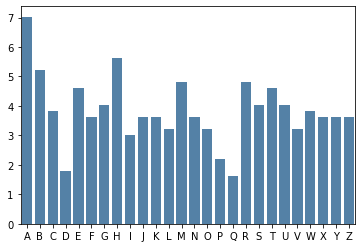

In [16]:
values = letterFrequency(ciphertext)
barplot(labels, values, color='steelblue');

Calculating the index of coincidence:

In [19]:
IC = 0
for prob in letterFrequency(ciphertext):
    IC += (prob/100)**2

print(IC)

0.0417090046934727


We can see that the IC value is $\approx 0.0417$ which is much closer to $0.038$ than $0.066$, and is therefore much more likely to be polyalphabetic than monoalphabetic. We still don't know if it was enciphered with Trithemius, Vigenère, or Autokey, but at least it has been narrowed down.